In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [12]:
SEED = 42
IMG_SIZE = (120, 120)
IMG_SHAPE = IMG_SIZE + (3,)
batch_size = 32
train_dir = 'drive/MyDrive/Personal Documents/Code/Programming/Captcha/data/train'
val_dir = 'drive/MyDrive/Personal Documents/Code/Programming/Captcha/data/val'
test_dir = 'drive/MyDrive/Personal Documents/Code/Programming/Captcha/data/test'

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255)

In [14]:
# Flows to read data in batches
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(120, 120), batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True, seed=SEED)

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(120, 120), batch_size=batch_size,
                                                class_mode='categorical', shuffle=True, seed=SEED)


Found 3803 images belonging to 8 classes.
Found 3798 images belonging to 8 classes.


In [5]:
pre_trained_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output


last layer output shape: (None, 5, 5, 768)


In [6]:
x = layers.Flatten()(last_output)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(8, activation='softmax')(x)

In [15]:
model = Model(pre_trained_model.input, x)
# model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

118

In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=int(train_generator.n / batch_size), # images / batch_size if we want to run all images
      epochs=10,
      validation_data=val_generator,
      validation_steps=int(val_generator.n / batch_size))

Epoch 1/10
118/118 [==============================] - 3231s 27s/step - loss: 1.5415 - acc: 0.4345 - val_loss: 0.8169 - val_acc: 0.7254
Epoch 2/10
118/118 [==============================] - 31s 263ms/step - loss: 1.0773 - acc: 0.6220 - val_loss: 0.7241 - val_acc: 0.7593
Epoch 3/10
118/118 [==============================] - 30s 259ms/step - loss: 1.0048 - acc: 0.6551 - val_loss: 0.6814 - val_acc: 0.7760
Epoch 4/10
118/118 [==============================] - 31s 264ms/step - loss: 0.9510 - acc: 0.6712 - val_loss: 0.6501 - val_acc: 0.7786
Epoch 5/10
118/118 [==============================] - 31s 261ms/step - loss: 0.9065 - acc: 0.6892 - val_loss: 0.6662 - val_acc: 0.7873
Epoch 6/10
118/118 [==============================] - 31s 265ms/step - loss: 0.9445 - acc: 0.6698 - val_loss: 0.6252 - val_acc: 0.8011
Epoch 7/10
118/118 [==============================] - 32s 270ms/step - loss: 0.8507 - acc: 0.6935 - val_loss: 0.6028 - val_acc: 0.8053
Epoch 8/10
118/118 [==============================] - 3

In [ ]:
# [13]
# history = model.fit(
#       train_generator,
#       steps_per_epoch=10, # images / batch_size if we want to run all images
#       epochs=5,
#       validation_data=val_generator,
#       validation_steps=5)
# Epoch 1/5
# 10/10 [==============================] - 226s 23s/step - loss: 0.5574 - acc: 0.6865 - val_loss: 0.2018 - val_acc: 0.9250
# Epoch 2/5
# 10/10 [==============================] - 104s 11s/step - loss: 0.3240 - acc: 0.8745 - val_loss: 0.2419 - val_acc: 0.9125
# Epoch 3/5
# 10/10 [==============================] - 54s 6s/step - loss: 0.2907 - acc: 0.8878 - val_loss: 0.2427 - val_acc: 0.9125
# Epoch 4/5
# 10/10 [==============================] - 28s 3s/step - loss: 0.3174 - acc: 0.8761 - val_loss: 0.1529 - val_acc: 0.9438
# Epoch 5/5
# 10/10 [==============================] - 21s 2s/step - loss: 0.2402 - acc: 0.8911 - val_loss: 0.0865 - val_acc: 0.9500

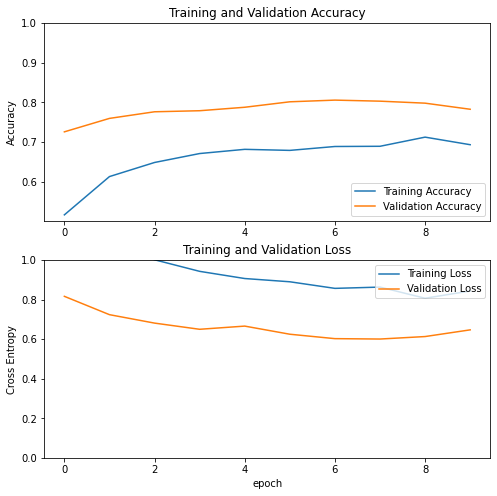

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()